<center><h1> <font color="blue"> Morphological Operators </font></h1></center>
<h2><div align="right"> <font color ="tomato"> Prepared by: Dr.S.Rajalakshmi </font> </h2>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<h2> <font color="tomato"> Function to Load the image </font></h2>

In [2]:
def load_img():
    blank_img =np.zeros((600,600))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img,text='vision',org=(50,300),
                fontFace=font,fontScale= 5,color=(255,255,255),
                thickness=25,lineType=cv2.LINE_AA)
    return blank_img

<h2> <font color="tomato"> Function to display the image </font></h2>


In [3]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

<h2> <font color="tomato"> Load and display the image </font></h2>


In [4]:
img = load_img()

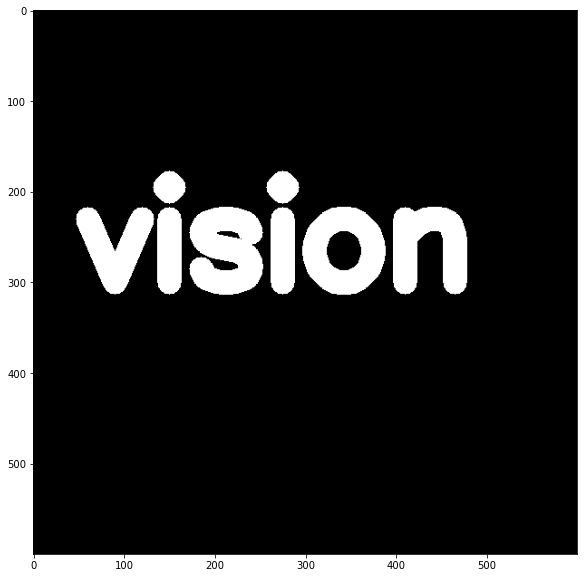

In [5]:
display_img(img)

<h2> <font color="tomato"> Create the kernel </font></h2>


In [6]:
kernel = np.ones((5,5),np.uint8)


<h2> <font color="tomato"> 1. Erosion </font></h2>



In [7]:
erosion1 = cv2.erode(img,kernel,iterations = 1)

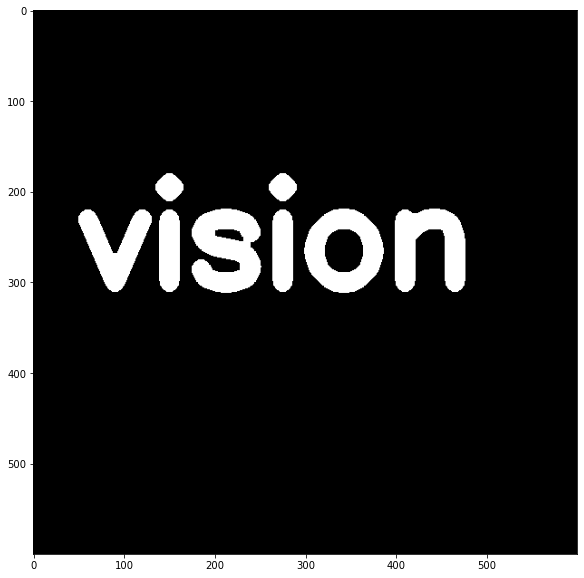

In [8]:
display_img(erosion1)

<p> <font color="tomato"> erosion with iterations = 4 </font></p>



In [9]:
img = load_img()
kernel = np.ones((5,5),np.uint8)
erosion5 = cv2.erode(img,kernel,iterations = 4)

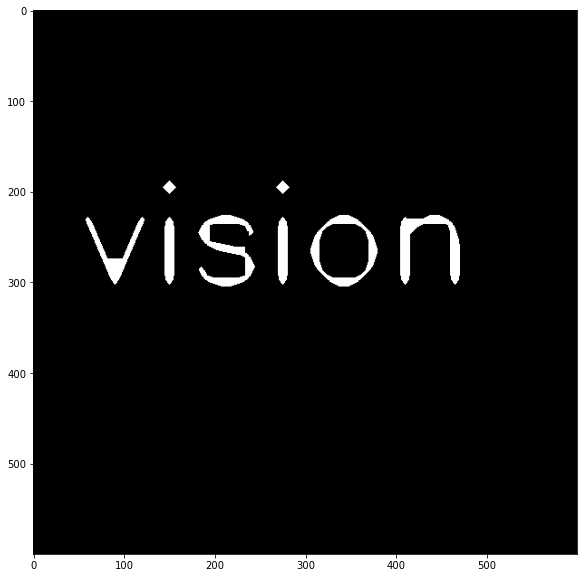

In [10]:
display_img(erosion5)

<h2> <font color="tomato"> 2. Dilation </font></h2>


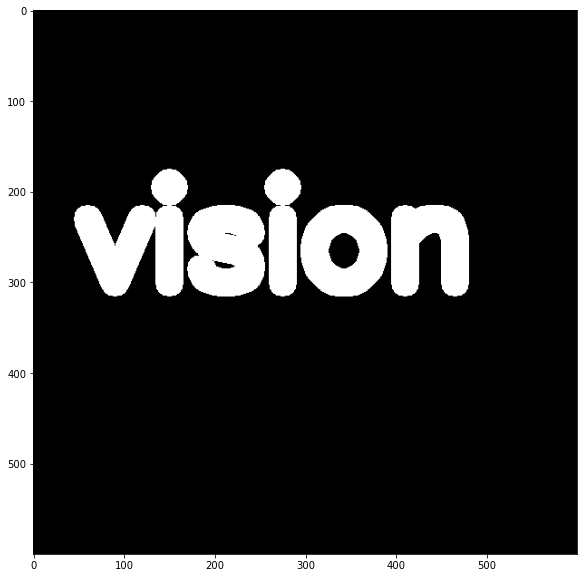

In [11]:
img = load_img()
dil5 = cv2.dilate(img,kernel,iterations = 1)
display_img(dil5)

<h2> <font color="tomato"> 3. Opening </font></h2>


In [12]:
img = load_img()

<font color ="purple"><p>generates a 600x600 matrix (2D array) where each element is a random integer between 0 (inclusive) and 2 (exclusive). This means each element in the matrix will be either 0 or 1.</p></font>

In [13]:
white_noise = np.random.randint(low=0,high=2,size=(600,600))

In [14]:
white_noise

array([[1, 0, 1, ..., 0, 1, 1],
       [1, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 1],
       ...,
       [1, 1, 0, ..., 1, 0, 0],
       [1, 0, 1, ..., 1, 1, 1],
       [0, 1, 0, ..., 0, 0, 0]])

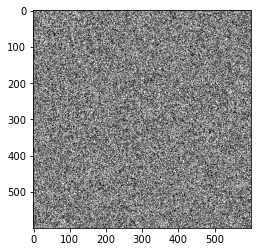

In [15]:
plt.imshow(white_noise,cmap='gray')

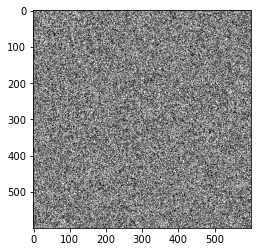

In [16]:
#mandatory
white_noise = white_noise*255
plt.imshow(white_noise,cmap ='gray')

In [17]:
white_noise.shape

(600, 600)

In [18]:
img.shape

(600, 600)

In [19]:
noise_img = white_noise+img

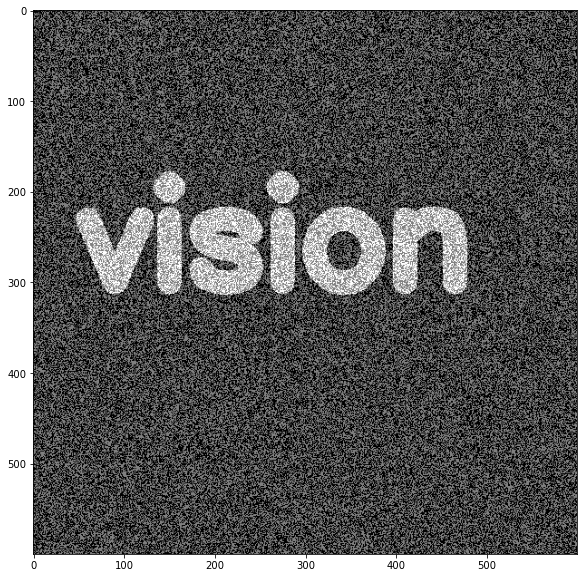

In [20]:
display_img(noise_img)

<p> <font color = "tomato">
    <ul>
<li>cv2.morphologyEx(): This is a function in OpenCV used to apply advanced morphological transformations. It can perform various operations like opening, closing, gradient, top hat, and black hat.</li>

<li>noise_img: This is the input image on which the morphological operation is performed. It is usually a binary image, where the morphological operations can effectively remove noise.</li>

<li>cv2.MORPH_OPEN: This specifies the type of morphological operation to be performed, which in this case is "opening". Morphological opening is a combination of erosion followed by dilation. It is commonly used to remove small noise or detach connected objects in a binary image.</li>

<li>kernel: This is the structuring element used in the morphological operation. The kernel defines the neighborhood over which the operation is applied. It is typically a small matrix (e.g., 3x3) of ones, but it can have different shapes and sizes depending on the task.</li>
</ul>
    </font>
</p>

In [21]:
opening = cv2.morphologyEx(noise_img, cv2.MORPH_OPEN, kernel)

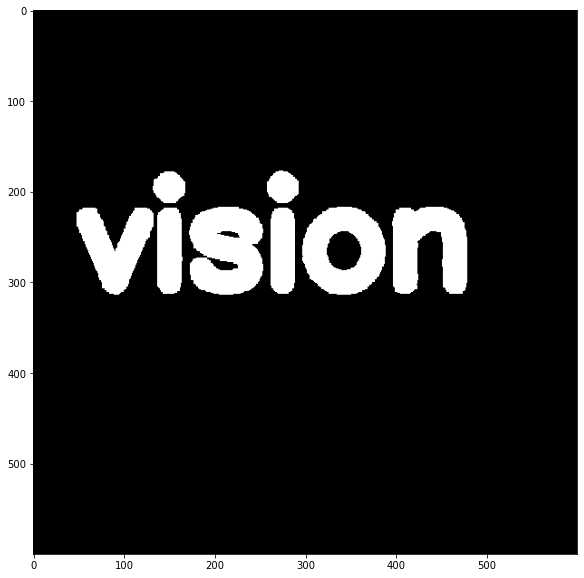

In [22]:
display_img(opening)

<h2> <font color = "tomato"> 3. Closing </font> </h2>

<font color= "violet"> <p>Useful in removing noise from foreground objects, such as black dots on top of the white text.<p> </font>

In [23]:
img = load_img()

In [24]:
black_noise = np.random.randint(low=0,high=2,size=(600,600))

In [25]:
black_noise

array([[1, 0, 0, ..., 0, 0, 1],
       [0, 1, 1, ..., 0, 1, 0],
       [1, 0, 0, ..., 1, 0, 1],
       ...,
       [0, 0, 0, ..., 1, 1, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 1, 1, 1]])

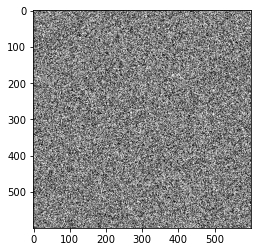

In [26]:
plt.imshow(black_noise,cmap='gray')

In [27]:
black_noise= black_noise * -255

In [28]:
black_noise

array([[-255,    0,    0, ...,    0,    0, -255],
       [   0, -255, -255, ...,    0, -255,    0],
       [-255,    0,    0, ..., -255,    0, -255],
       ...,
       [   0,    0,    0, ..., -255, -255,    0],
       [   0, -255, -255, ...,    0,    0,    0],
       [   0,    0, -255, ..., -255, -255, -255]])

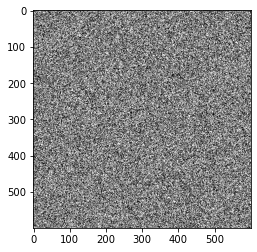

In [29]:
plt.imshow(black_noise,cmap='gray')

In [30]:
black_noise_img = img + black_noise

black_noise_img == -255: This part of the code creates a boolean mask where every pixel with a value of -255 in black_noise_img is marked as True.
black_noise_img[...] = 0: The code then sets all pixels that were -255 to 0.

In [31]:
black_noise_img[black_noise_img==-255] = 0

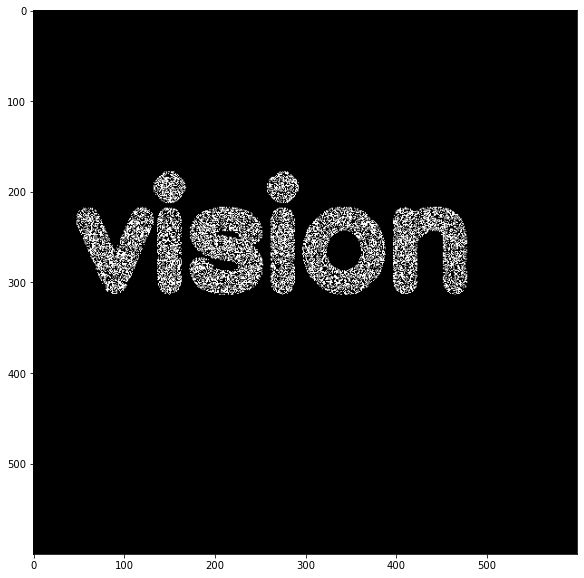

In [32]:
display_img(black_noise_img)

In [33]:
closing = cv2.morphologyEx(black_noise_img, cv2.MORPH_CLOSE, kernel)

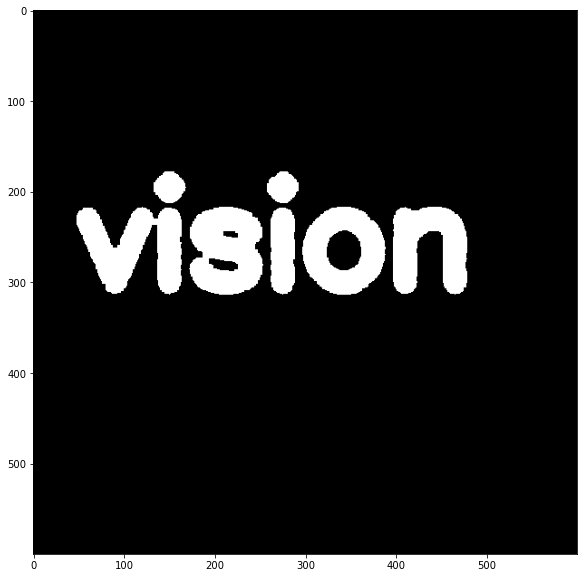

In [34]:
display_img(closing)

<h2> <font color = "blue"> 5. Morphological Gradient </font> </h2>

In [35]:
img = load_img()

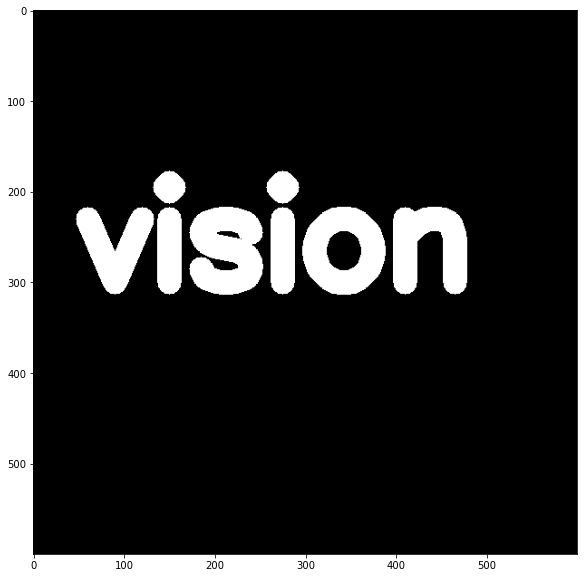

In [36]:
display_img(img)

<p> <font color="blue"> The morphological gradient is computed as the difference between the dilation and erosion of an image:
Gradient = Dilation - Erosion
Gradient=Dilation−Erosion
Dilation expands the white regions (foreground) in the image.
    Erosion shrinks the white regions (foreground) in the image.</font></p>

In [37]:
gradient = cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel)

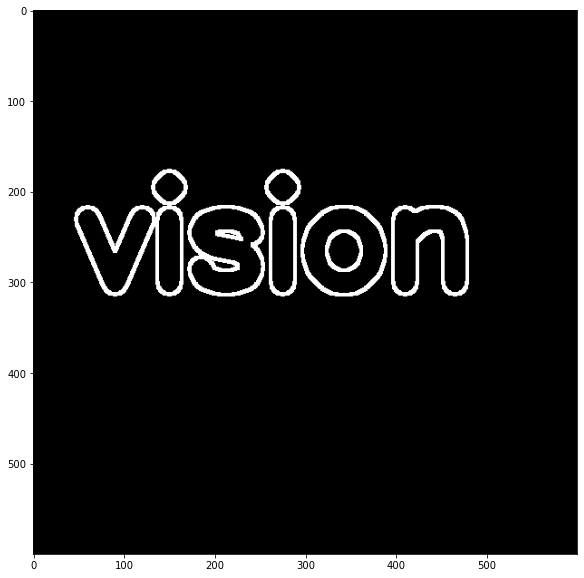

In [38]:
#The output image (gradient) will highlight the edges in the original image img. 
#The brighter areas in the gradient image correspond to regions with high contrast in the original image,
#effectively showing the boundaries of objects.
display_img(gradient)

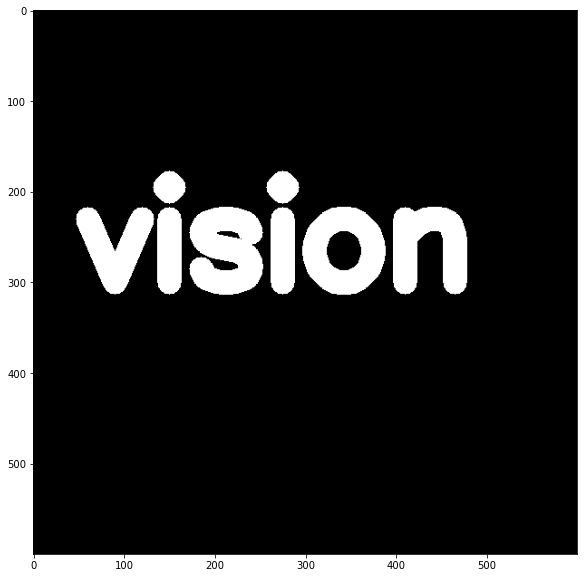

In [39]:
img = load_img()
display_img(img)


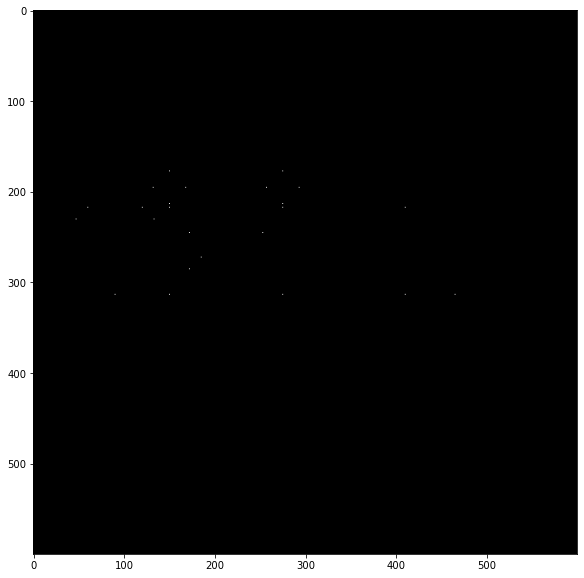

In [40]:
tophat =  cv2.morphologyEx(img,cv2.MORPH_TOPHAT,kernel)
display_img(tophat)

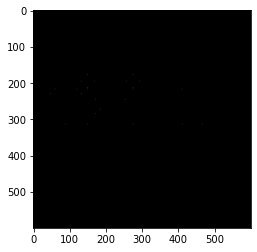

In [41]:
plt.imshow(tophat,cmap='gray')

In [42]:
img = load_img()
blackhat =  cv2.morphologyEx(img,cv2.MORPH_BLACKHAT,kernel)

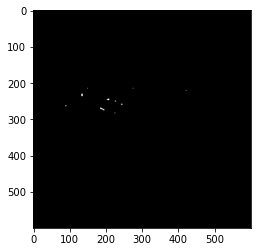

In [43]:
plt.imshow(blackhat,cmap='gray')